###  BLM5103 :  Bilgisayarla Görme -  Harris Corner Detector
  
  Esra Türkan 


  


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Görüntünün Okunması

In [ ]:
cow_image=cv2.imread("/image.png",cv2.IMREAD_GRAYSCALE)

Görüntünün x ve y yönünde türevini almak için iki adet kernel oluşturulur.

In [ ]:
x=np.array([[1,0,-1]])
y=np.transpose(x)

Görüntünün türevi alınır.

In [ ]:
turevX=cv2.filter2D(cow_image,-1,x)
turevY=cv2.filter2D(cow_image,-1,y)

turevXY=cv2.filter2D(turevX,-1,y)

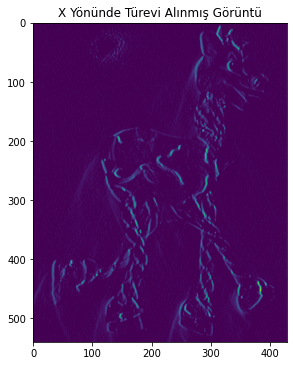

In [ ]:
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,2)
plt.title('X Yönünde Türevi Alınmış Görüntü')
plt.imshow(turevX)

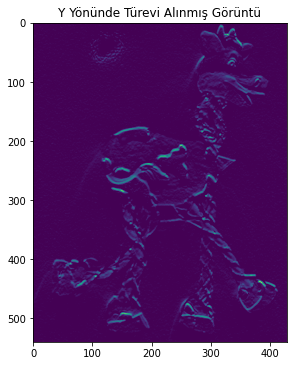

In [ ]:
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,2)
plt.title('Y Yönünde Türevi Alınmış Görüntü')
plt.imshow(turevY)

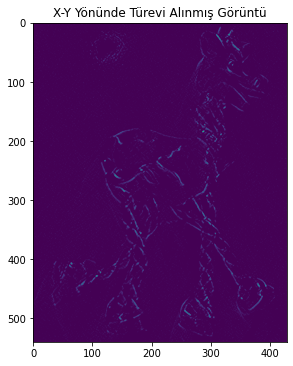

In [ ]:
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,2)
plt.title('X-Y Yönünde Türevi Alınmış Görüntü')
plt.imshow(turevXY)

Gauss Fonksiyonu Tanımlanır.

In [ ]:
def gauss2DKernel(size,variance):
    x ,y=np.mgrid[-size : size+1,-size : size+1]
    

    exp= np.exp(-(x**2+y**2)/(2*variance))
    return exp/(2*(np.pi)*variance)

In [ ]:
gaussKernel=gauss2DKernel(3,2)

turevX=cv2.filter2D(turevX,-1,gaussKernel)
turevY=cv2.filter2D(turevY,-1,gaussKernel)

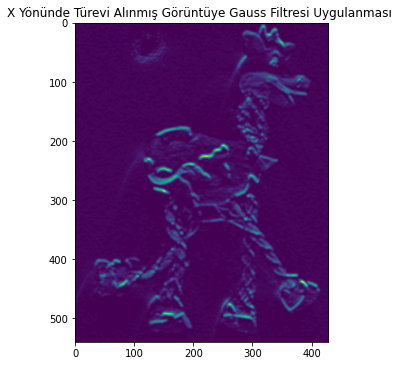

In [ ]:
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,2)
plt.title('X Yönünde Türevi Alınmış Görüntüye Gauss Filtresi Uygulanması ')
plt.imshow(turevY)

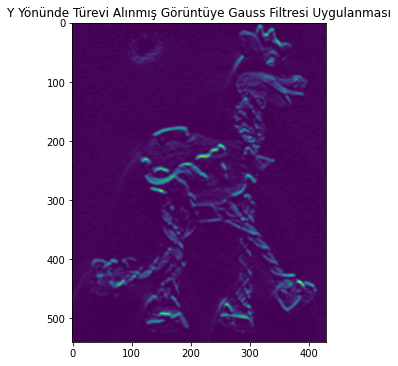

In [ ]:
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,2)
plt.title('Y Yönünde Türevi Alınmış Görüntüye Gauss Filtresi Uygulanması')
plt.imshow(turevY)

Second Moment Matris Oluşturulması

In [ ]:
gradient=np.array([[turevX,turevY]])
gradient=np.transpose(gradient,axes=(2,3,1,0))
gradientT=np.transpose(gradient,axes=(0,1,3,2))


M=np.matmul(gradient,gradientT).astype(np.float32)


Eigen Value Hesaplanması

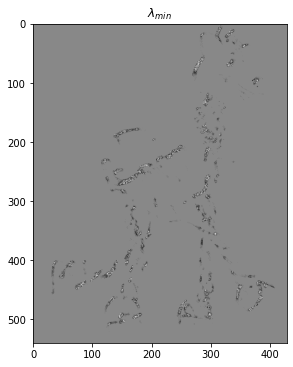

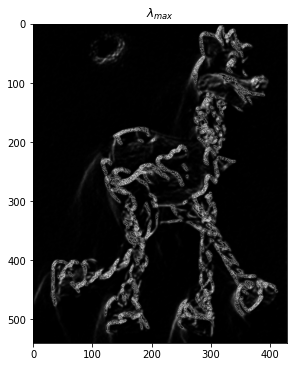

In [ ]:
eigenValue=np.linalg.eigvals(M)

eigenMin=np.min(eigenValue,-1)
eigenMax=np.max(eigenValue,-1)

fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,2)
plt.title("$\lambda_{min}$")
plt.imshow(eigenMin,cmap="gray")



fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,2)
plt.title("$\lambda_{max}$")
plt.imshow(eigenMax,cmap="gray")


Elipslerin oluşturulması

In [ ]:
from matplotlib.patches import Ellipse

window=10
ellipse_height=eigenMax**(1/2)
ellipse_width=(np.abs(eigenMin)**(1/2))


ellipses=[Ellipse((_j*window+window//2,_i*window+window//2), 
                  np.sum(ellipse_width[i*window:(i+1)*window,j*window:(j+1)*window])/window**2, #width

                  np.sum(ellipse_height[i*window:(i+1)*window,j*window:(j+1)*window])/window**2, #height
                  np.sum(cow_image[i*window:(i+1)*window,j*window:(j+1)*window])/window**2, #angle
                  edgecolor="red",fill=False)
          for _i,i in enumerate(range(0,cow_image.shape[0]//window))
          for _j,j in enumerate(range(0,cow_image.shape[1]//window))]



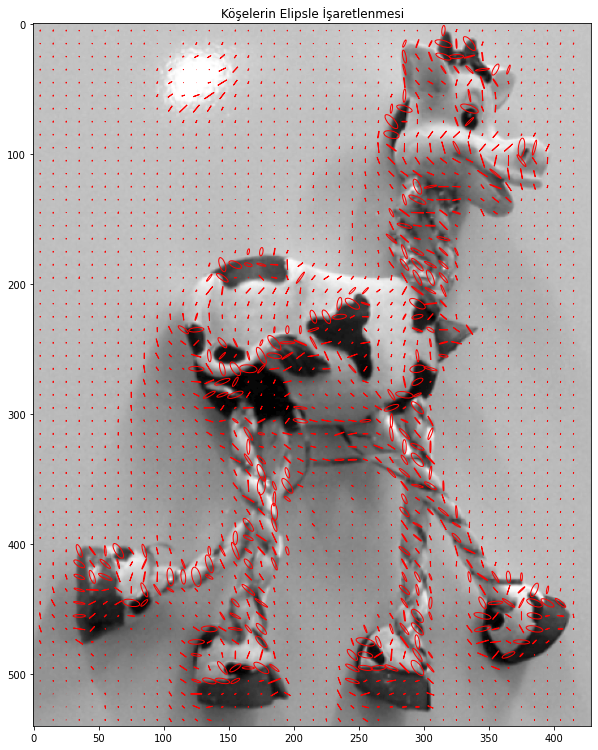

In [ ]:
fig = plt.figure(figsize=(10, 20))
ax=fig.add_subplot(111)
for i in ellipses:
    i.set_clip_box(ax.bbox)
    ax.add_artist(i)
plt.title("Köşelerin Elipsle İşaretlenmesi")
plt.imshow(cow_image,cmap="gray")